## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

from google.colab import drive
drive.mount('/drive')

df = pd.read_csv('/drive/My Drive/capstone project/creditcard.csv')
df.head()

In [2]:
#reading the data
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#checking for null values
round(100*(df.isnull().sum()/len(df.index)), 2)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

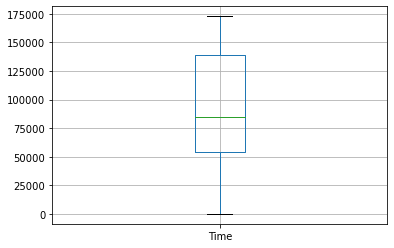

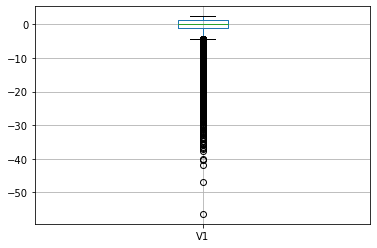

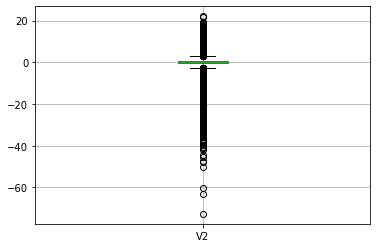

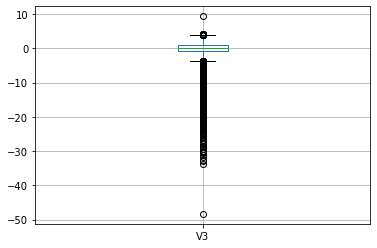

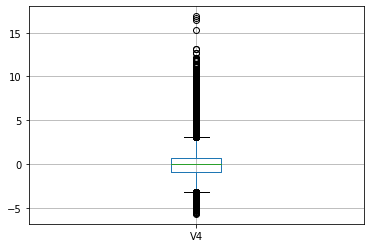

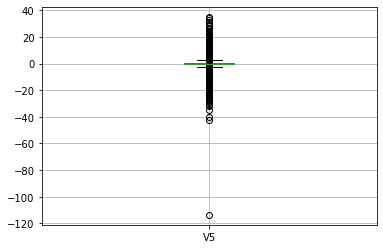

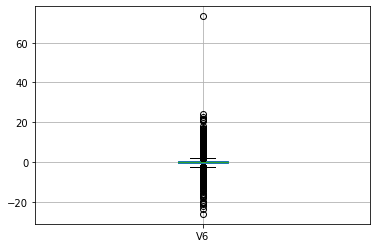

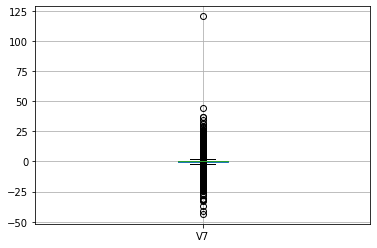

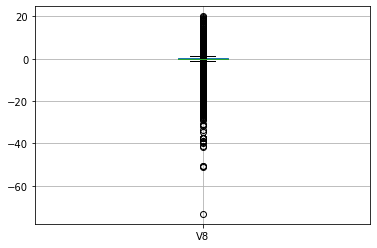

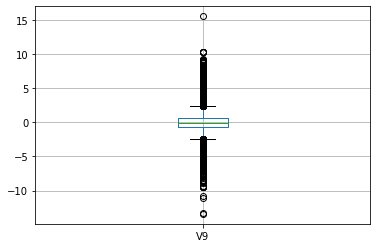

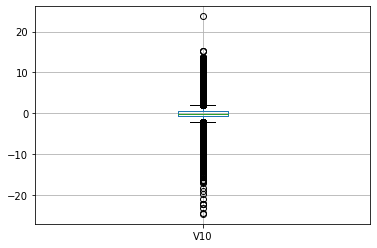

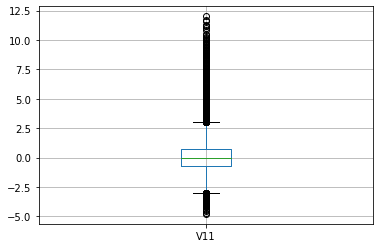

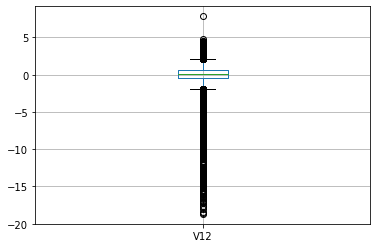

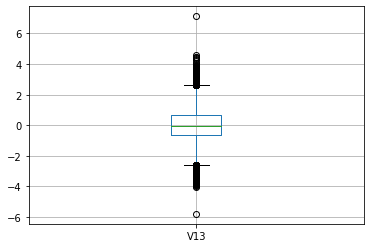

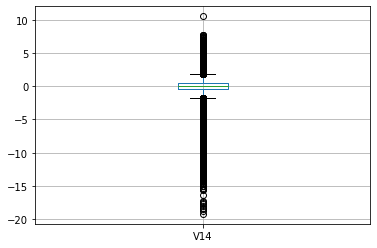

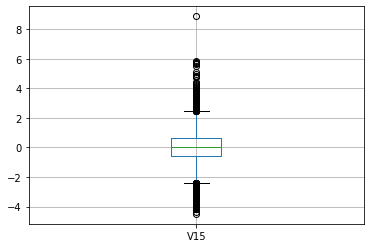

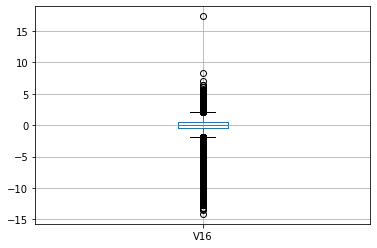

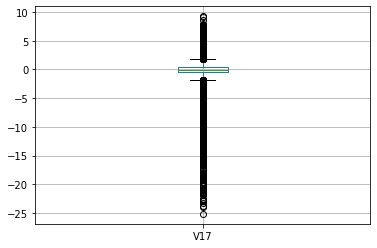

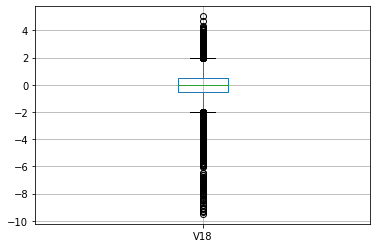

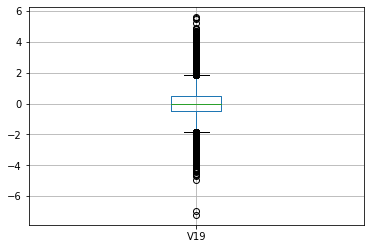

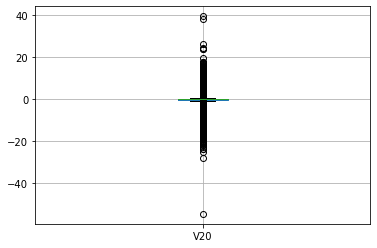

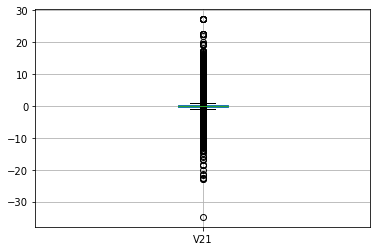

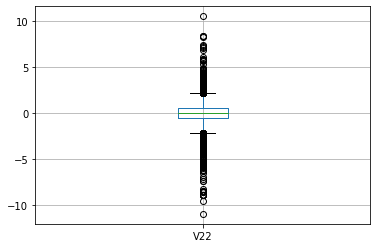

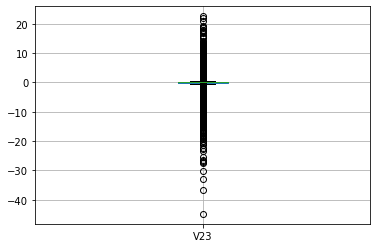

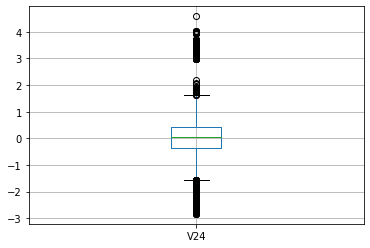

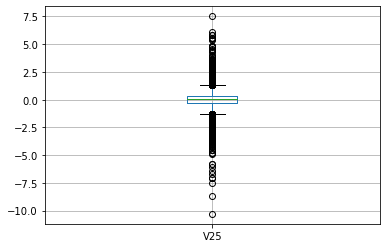

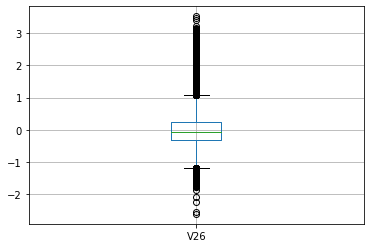

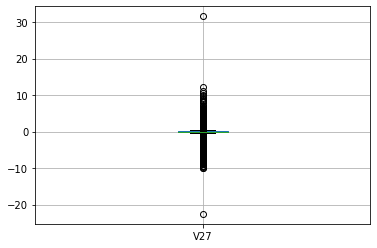

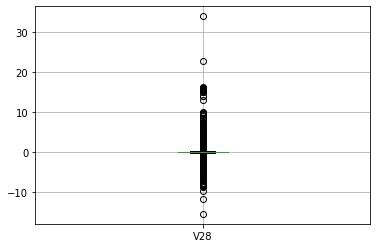

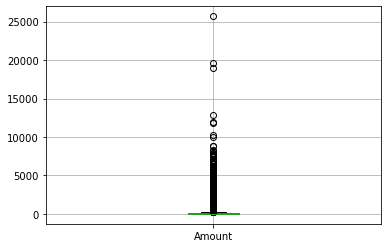

In [6]:
#checking for outliers
col= list(df.columns)
col.remove('Class')
for c in col:  
    plt.figure()
    df.boxplot([c], return_type='axes')

Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(classes)
print(normal_share)
print(fraud_share)

0    284315
1       492
Name: Class, dtype: int64
99.82725143693798
0.1727485630620034


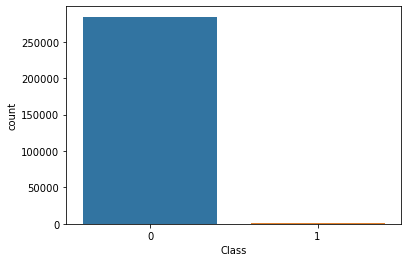

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

sns.countplot(x="Class", data=df)

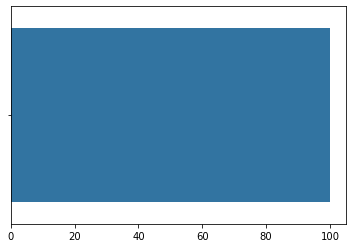

In [9]:
sns.barplot(x=normal_share, data=df)

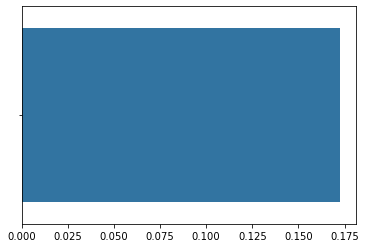

In [10]:
sns.barplot(x=fraud_share, data=df)

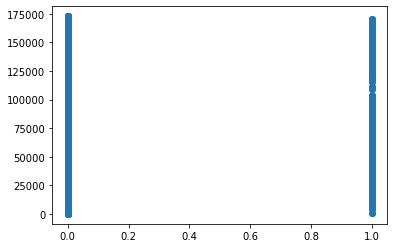

In [11]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df['Class'], df['Time'])

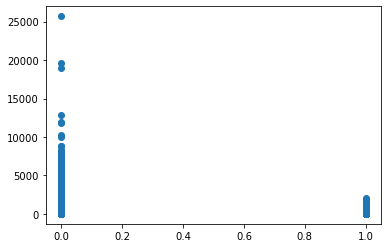

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df['Class'], df['Amount'])

In [13]:
correl= df.corr()


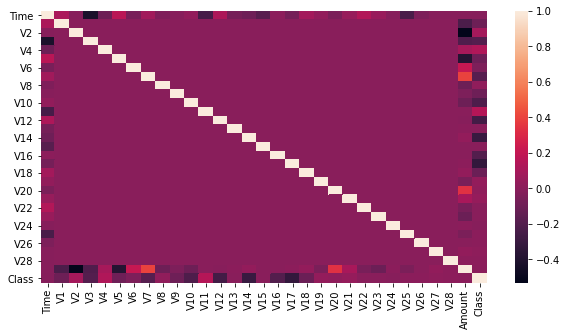

In [14]:
correlation plot
plt.figure(figsize=(10,5))
sns.heatmap(correl)

In [16]:
#variable to store all the roc_auc scores of model
score={}

### Splitting the data into train & test data

In [17]:
y= df['Class']
X= df.drop(['Class'], axis=1)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [18]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [19]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify= y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [20]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


In [21]:
# # Using Standard scaler to standardise the data..
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))

#dropping time column
X_train.drop(['Time'], axis=1, inplace=True)

# Transforming  test data
X_test['Amount']=scaler.transform(X_test['Amount'].values.reshape(-1,1))

#dropping time column

X_test.drop(['Time'], axis=1, inplace=True)

In [22]:
X_train.shape

(199364, 29)

In [23]:

X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
262922,-0.548103,1.376074,0.051147,4.300577,1.761938,0.081805,1.788166,-0.302164,-2.941339,1.393164,...,0.451713,0.316647,0.700714,-0.532490,-0.680250,1.232858,0.980223,-0.042880,0.053000,0.054772
123418,0.437324,1.824381,-2.299325,1.538479,0.791887,-1.414298,0.482083,0.339477,-0.674650,-1.234870,...,-0.009730,-0.077049,-0.170282,0.108469,-0.365513,-0.436975,-0.393859,0.121535,-0.061320,-0.322318
206135,2.056846,0.042030,-1.296059,0.368958,0.032669,-1.349797,0.334441,-0.463096,0.452703,-0.016376,...,-0.167702,0.261879,0.949829,-0.018148,0.109873,0.295611,-0.115295,-0.015115,-0.054976,-0.320256
273483,-0.497480,0.785269,1.695245,-0.644791,0.491553,0.430883,0.510721,0.053386,0.552390,-0.545978,...,0.212146,-0.280792,-0.548862,-0.367317,-0.044278,0.430846,-0.657662,0.179848,-0.081837,-0.359396
245758,1.611949,-0.938343,-1.200421,0.653356,-0.386518,-0.465937,0.069881,-0.147945,0.849526,0.005008,...,0.214406,0.081319,-0.184030,0.065733,0.742927,-0.283315,0.172087,-0.091352,-0.009690,0.575804


### Plotting the distribution of a variable

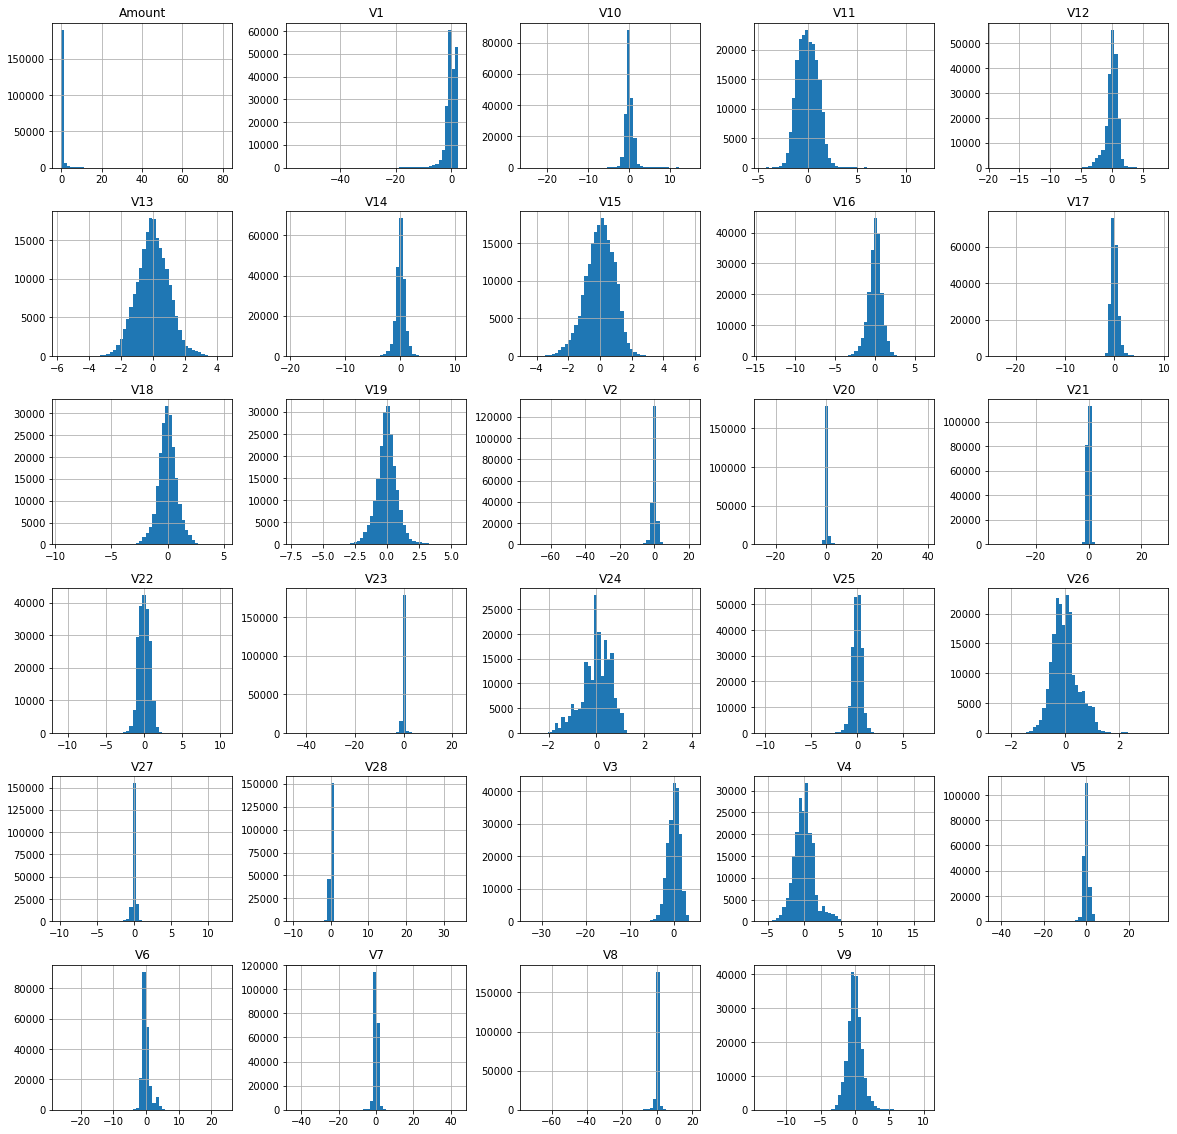

In [24]:
# plot the histogram of a variable from the dataset to see the skewness
X_train.hist(figsize=(20,20),bins=50)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [25]:
X_train.shape

(199364, 29)

In [26]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=True)
dX_train_transformed=pt.fit_transform(X_train)
dx_test_transformed=pt.transform(X_test)


In [27]:
# Converting power transformed dataset into dataframe
X_train=pd.DataFrame(data=dX_train_transformed,columns=X_train.columns)
X_test=pd.DataFrame(data=dx_test_transformed,columns=X_test.columns)

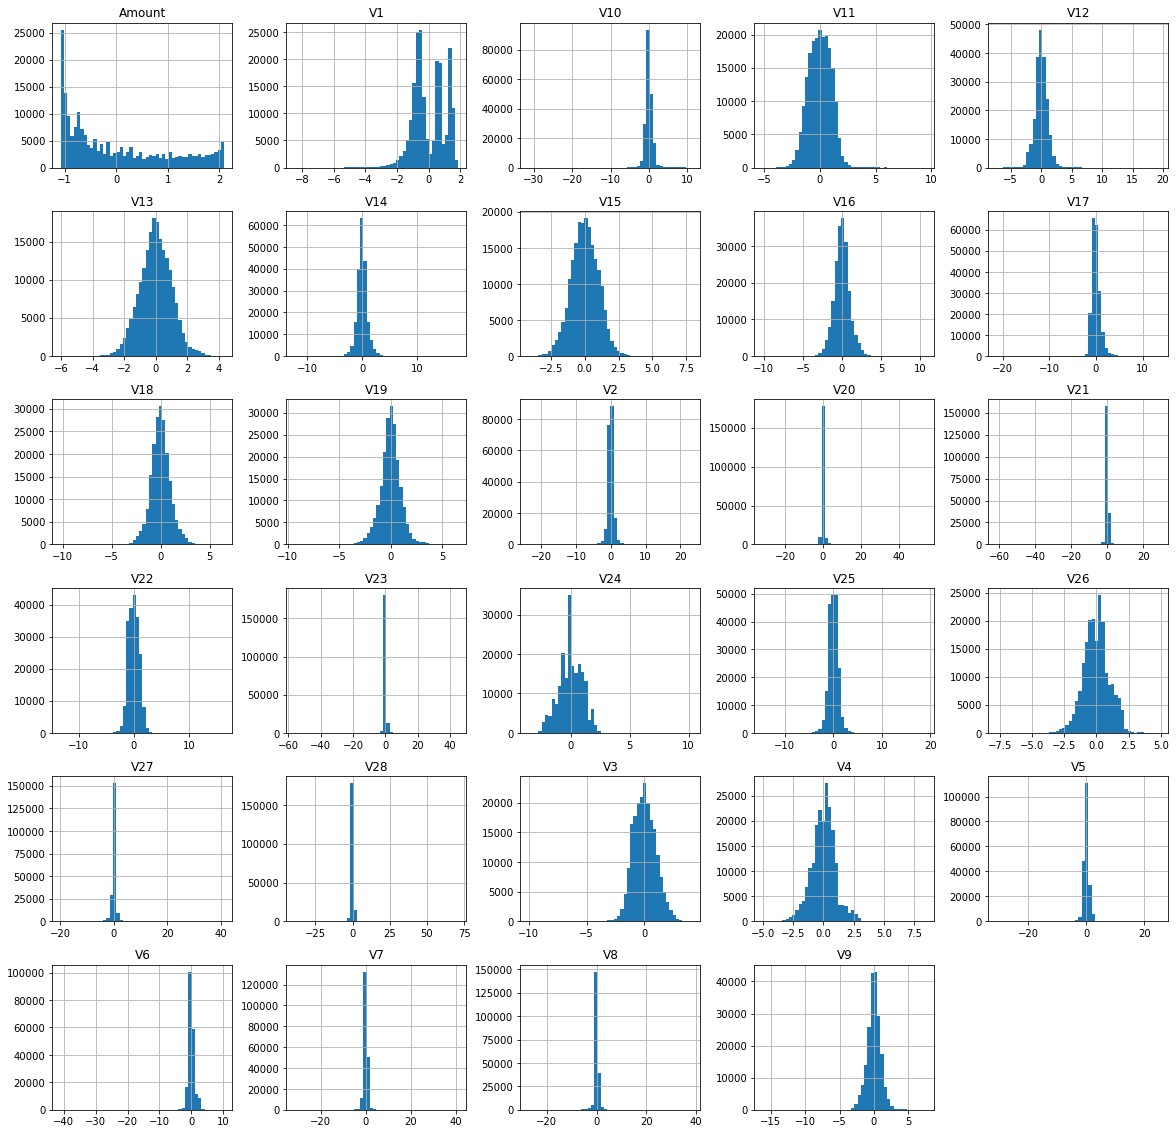

In [28]:
# plot the histogram of a variable from the dataset again to see the result 
X_train.hist(figsize=(20,20),bins=50)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [29]:
# Logistic Regression
from sklearn import linear_model #import the package
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform



# Logistic regression with unbalanced dataset

In [30]:
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)
#perform cross validation
clf= LogisticRegression()
scores = cross_val_score(clf,X_train, y_train, scoring='roc_auc', cv=folds)
scores      



array([0.99167975, 0.95323747, 0.98070969])

In [31]:
clf

LogisticRegression()

In [32]:
#perform hyperparameter tuning

# step-1: create a cross-validation scheme
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
model = LogisticRegression(max_iter=200,random_state=42)

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = np.logspace(0,4, 10)
#[100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = RandomizedSearchCV(model, grid, n_jobs=-1, cv=folds, scoring='roc_auc',error_score=0,verbose=1 )

grid_result = grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.6s finished


In [33]:
 #print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters
print(grid_result.best_score_, grid_result.best_params_)

0.9761202926375855 {'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [34]:
clf= LogisticRegression(penalty='l1', C=1.0,solver='liblinear',max_iter=200,random_state=42)

In [35]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=200, penalty='l1', random_state=42,
                   solver='liblinear')

In [36]:
y_pred= clf.predict_proba(X_test)[:,1]

In [37]:
y_pred

array([2.85784677e-03, 3.80277031e-03, 1.06984865e-04, ...,
       1.02911095e-04, 1.80371455e-04, 9.46198349e-05])

In [38]:
roc_auc_lr = metrics.roc_auc_score(y_test, y_pred )
print(roc_auc_lr)

0.9735083961386791


In [43]:
y_p= clf.predict(X_test)
print(metrics.roc_auc_score(y_test,y_p))

0.8107111566693019


In [39]:
['Imbalanced data logistic regression','roc_auc: {}'.format(round((roc_auc_lr*100),2))]

['Imbalanced data logistic regression', 'roc_auc: 97.35']

In [40]:
score['1']= ['Imbalanced data logistic regression','roc_auc: {}'.format(round((roc_auc_lr*100),2))]

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# Decision tree with Imbalanced dataset

In [41]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
cv_scores_dt= cross_val_score(dt_clf,X_train, y_train, cv=3,scoring='roc_auc')
cv_scores_dt

array([0.86935418, 0.87792171, 0.87702717])

In [44]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
from sklearn.metrics import  roc_auc_score

# Making predictions
y_pred_proba = dt_clf.predict_proba(X_test)[:,1]



In [46]:

print(roc_auc_score(y_test,y_pred_proba))

0.8747889677003341


###  hyperparameter tuning

In [47]:
# Create the parameter grid 
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}



# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = RandomizedSearchCV(dtree,param_grid,cv =folds,scoring='roc_auc', verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.9s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   scoring='roc_auc', verbose=1)

In [48]:
# printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.9568067928348527
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       min_samples_split=50)


In [49]:
# model with optimal hyperparameters
clf_dt = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       min_samples_split=50, random_state=100)

In [50]:
# Making predictions
y_pred = clf_dt.predict_proba(X_test)[:,1]



In [51]:
roc_auc_dt= sklearn.metrics.roc_auc_score(y_test, y_pred)
print(roc_auc_dt)

0.9405485017815753


In [52]:
score['2']= ['Imbalanced data Decision tree','roc_auc: {}'.format(round((roc_auc_dt*100),2))]

# Random forest with Imbalanced dataset

In [53]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
cv_scores_rfc= cross_val_score(rfc,X_train, y_train, cv=3,scoring='roc_auc')
cv_scores_rfc

array([0.94617878, 0.96812062, 0.92789259])

In [54]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
# Making predictions
predictions = rfc.predict_proba(X_test)[:,1]

In [56]:
print(roc_auc_score(y_test,predictions))

0.937601812786466


### hyperparameter tuning

In [58]:
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(rf, param_grid, 
                          cv = folds,scoring='roc_auc' ,n_jobs = -1,verbose = 1)

In [59]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc', verbose=1)

In [60]:
# printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_,grid_search.best_params_)

0.9761477985071165 {'n_estimators': 300, 'min_samples_split': 400, 'min_samples_leaf': 300, 'max_features': 5, 'max_depth': 10}


In [61]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=300, 
                             min_samples_split=400,
                             max_features=5,
                             n_estimators=300)

In [62]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=300,
                       min_samples_split=400, n_estimators=300)

In [63]:
# predict
predictions = rfc.predict_proba(X_test)[:,1]

In [64]:
roc_auc_rf= roc_auc_score(y_test,predictions)
print(roc_auc_rf)

0.9681590362858316


In [65]:
score['3']= ['Imbalanced data random forest','roc_auc: {}'.format(round((roc_auc_rf*100),2))]

# XGBoost with Imbalanced dataset

In [66]:
pip install xgboost

In [67]:
from xgboost import XGBClassifier


In [68]:

# fit model no training data
xgb_clf = XGBClassifier()

cv_scores_rfc= cross_val_score(xgb_clf,X_train, y_train, cv=3,scoring='roc_auc')
cv_scores_rfc



array([0.98677878, 0.9833038 , 0.96888457])

In [69]:
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
y_pridicted= xgb_clf.predict_proba(X_test)[:,1]

In [71]:
print(roc_auc_score(y_test,y_pridicted))

0.9741683473731073


### hyperparameter tuning

In [73]:
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)
param={'max_depth': range(1, 10, 2),
        'reg_lambda' : [0,1],
        'colsample_bytree' : [0.5,1],
        'min_child_weight' : range (0, 10, 2),
        'n_estimators': range(100,400,100)
    }

xgb_clf_tuned = XGBClassifier()

grid_search = RandomizedSearchCV(xgb_clf_tuned,  param, 
                          cv = folds,scoring='roc_auc' ,n_jobs = -1,verbose = 1)


grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=Non

In [74]:
# printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_,grid_search.best_params_)

0.9790614510721145 {'reg_lambda': 1, 'n_estimators': 300, 'min_child_weight': 0, 'max_depth': 9, 'colsample_bytree': 1}


In [75]:
xgb_clf_final = XGBClassifier(n_estimators=300, colsample_bytree=1, max_depth=9,min_child_weight=0, reg_lambda=1, n_jobs=-1)

In [76]:
xgb_clf_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
y_pred= xgb_clf_final.predict_proba(X_test)[:,1]

In [78]:
roc_auc_xg= roc_auc_score(y_test,y_pred)
print(roc_auc_xg)

0.974783779030804


In [79]:
score['4']= ['Imbalanced data XGboost','roc_auc: {}'.format(round((roc_auc_xg*100),2))]

In [80]:
for x, y in score.items():
    print(x, y)

1 ['Imbalanced data logistic regression', 'roc_auc: 97.35']
2 ['Imbalanced data Decision tree', 'roc_auc: 94.05']
3 ['Imbalanced data random forest', 'roc_auc: 96.82']
4 ['Imbalanced data XGboost', 'roc_auc: 97.48']


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 27


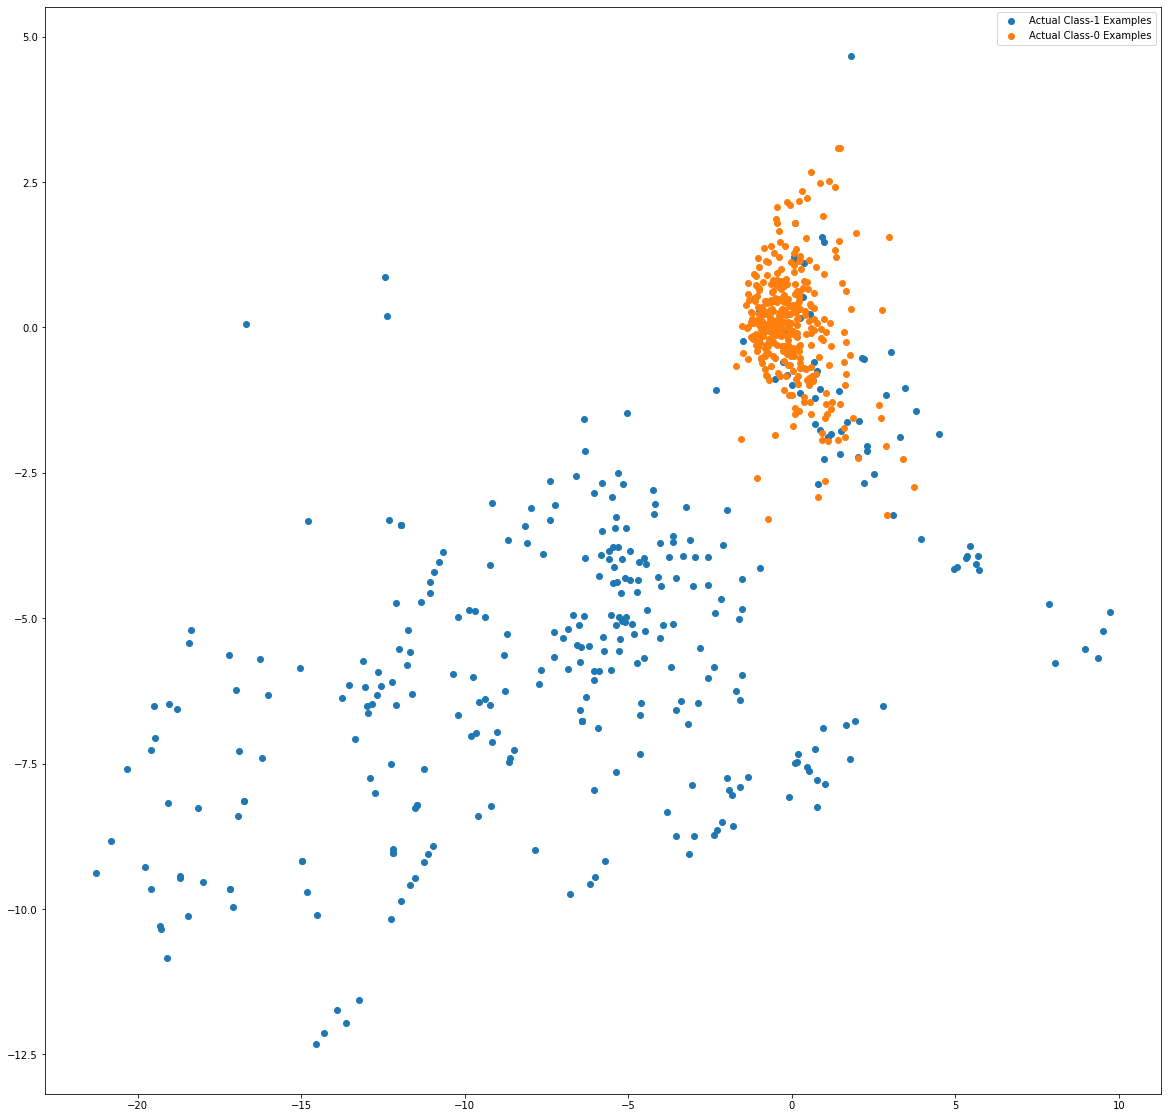

In [82]:
var_imp = []
for i in xgb_clf_final.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_clf_final.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_clf_final.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_clf_final.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_clf_final.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_clf_final.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [83]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [84]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

## Logistic regression with Oversampling


In [86]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform cross validation
bal_logreg= LogisticRegression()
scores = cross_val_score(bal_logreg, X_res, y_res, scoring='roc_auc', cv=3)
scores    

array([0.98833947, 0.98833792, 0.98772799])

In [87]:
#perform hyperparameter tuning
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
model = LogisticRegression(max_iter=200, random_state=42)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = np.logspace(0,4, 10)
#[100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = RandomizedSearchCV(model, grid, n_jobs=-1, cv=folds, scoring='roc_auc',error_score=0,verbose=1 )
grid_result = grid_search.fit(X_res, y_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.8s finished


In [88]:
#print the evaluation result by choosing a evaluation metric
print(grid_result.best_score_, grid_result.best_params_)
#print the optimum value of hyperparameters


0.9881356450345008 {'solver': 'lbfgs', 'penalty': 'l2', 'C': 166.81005372000593}


In [224]:
lr_clf_os= LogisticRegression(penalty='l2', C=166.81005372000593, solver='lbfgs')

In [225]:
lr_clf_os.fit(X_res, y_res)

LogisticRegression(C=166.81005372000593)

In [226]:
# Predict probablity
pred_probs_test = lr_clf_os.predict_proba(X_test)[:,1]
pred_probs_test

array([0.36365289, 0.65950156, 0.04280045, ..., 0.01349696, 0.06379034,
       0.01877553])

In [227]:
roc_auc_lros= metrics.roc_auc_score(y_test,pred_probs_test)
print(roc_auc_lros)

0.9784427416454499


In [93]:
score['5']= ['Logistic Regression with Oversampling','roc_auc: {}'.format(round((roc_auc_lros*100),2))]

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [94]:
for x, y in score.items():
    print(x, y)

1 ['Imbalanced data logistic regression', 'roc_auc: 97.35']
2 ['Imbalanced data Decision tree', 'roc_auc: 94.05']
3 ['Imbalanced data random forest', 'roc_auc: 96.82']
4 ['Imbalanced data XGboost', 'roc_auc: 97.48']
5 ['Logistic Regression with Oversampling', 'roc_auc: 97.84']


# Decision Tree with Oversampling

In [95]:
from sklearn.tree import DecisionTreeClassifier

dt_clf_b = DecisionTreeClassifier()
cv_scores_dt= cross_val_score(dt_clf_b,X_res, y_res, cv=3,scoring='roc_auc')
cv_scores_dt

array([0.99963823, 0.99967591, 0.99975128])

In [96]:
dt_clf_b.fit(X_res, y_res)

DecisionTreeClassifier()

In [97]:
from sklearn.metrics import roc_auc_score

# Making predictions
y_pred_default = dt_clf_b.predict_proba(X_test)[:,1]



In [98]:

print(roc_auc_score(y_test,y_pred_default))

0.8984434783573069


###  hyperparameter tuning

In [99]:
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}



# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = RandomizedSearchCV( dtree, param_grid, 
                          cv = folds,scoring='roc_auc', verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_res, y_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.6s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   scoring='roc_auc', verbose=1)

In [100]:
# printing the optimal accuracy score and hyperparameters
print( grid_search.best_score_)
print(grid_search.best_estimator_)

0.9996898504814077
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50)


In [101]:
# model with optimal hyperparameters
clf_dt = DecisionTreeClassifier(criterion = "entropy", 
                                
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_dt.fit(X_res, y_res)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50)

In [102]:
# Making predictions
y_pred_proba_dt = clf_dt.predict_proba(X_test)[:,1]



In [103]:
roc_auc_dtos= sklearn.metrics.roc_auc_score(y_test, y_pred_proba_dt)
print(roc_auc_dtos)

0.9148119087491267


In [104]:
score['6']= ['Decision Tree with Oversampling','roc_auc: {}'.format(round((roc_auc_dtos*100),2))]

# Random forest with Oversampling

In [105]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
cv_scores_rfc= cross_val_score(rfc,X_res, y_res, cv=3,scoring='roc_auc')
cv_scores_rfc

array([1.        , 0.99999246, 1.        ])

In [106]:
# fit
rfc.fit(X_res, y_res)

RandomForestClassifier()

In [107]:
# Making predictions
predictions = rfc.predict_proba(X_test)[:,1]

In [108]:
print(roc_auc_score(y_test,predictions))

0.9374890879507212


### hyperparameter tuning


In [109]:
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(rf,  param_grid, 
                          cv = folds,scoring='roc_auc' ,n_jobs = -1,verbose = 1)

In [110]:
# Fit the grid search to the data
grid_search.fit(X_res, y_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.1min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc', verbose=1)

In [111]:
# printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_,grid_search.best_params_)

0.9999262889515271 {'n_estimators': 300, 'min_samples_split': 200, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 10}


In [112]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_b = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [113]:
# fit
rfc_b.fit(X_res, y_res)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300)

In [114]:
# predict
predictions = rfc.predict_proba(X_test)[:,1]

In [115]:
roc_auc_rfos= roc_auc_score(y_test,predictions)
print(roc_auc_rfos)

0.9374890879507212


In [116]:
score['7']= ['Random Forest with Oversampling','roc_auc: {}'.format(round((roc_auc_rfos*100),2))]

# XGBoost with Oversampling

In [117]:
from xgboost import XGBClassifier

In [118]:
# fit model no training data
xgb_clf = XGBClassifier()

cv_scores_rfc= cross_val_score(xgb_clf,X_res, y_res, cv=3,scoring='roc_auc')
cv_scores_rfc


array([0.99999805, 0.99997686, 1.        ])

In [119]:
xgb_clf.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [120]:
y_pridicted= xgb_clf.predict_proba(X_test)[:,1]

In [121]:
print(roc_auc_score(y_test,y_pridicted))

0.9730861731066902


### hyperparameter tuning

In [122]:

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

param={'max_depth': range(1, 10, 2),
        'reg_lambda' : [0,1],
        'colsample_bytree' : [0.5,1],
        'min_child_weight' : range (0, 10, 2),
        'n_estimators': range(100,400,100)
    }

xgb_clf_tuned = XGBClassifier()

grid_search = RandomizedSearchCV(xgb_clf_tuned, param, 
                          cv = folds,scoring='roc_auc' ,n_jobs = -1,verbose = 1)


grid_search.fit(X_res, y_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 21.4min finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 21.4min remaining:    0.0s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=Non

In [123]:
# printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_,grid_search.best_params_)

0.9999955949361397 {'reg_lambda': 1, 'n_estimators': 300, 'min_child_weight': 0, 'max_depth': 5, 'colsample_bytree': 1}


In [124]:
xgb_clfb_final = XGBClassifier(n_estimators=300, colsample_bytree=1, max_depth=5,min_child_weight=0, reg_lambda=1, n_jobs=-1)

In [125]:
xgb_clfb_final.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
y_pred= xgb_clfb_final.predict_proba(X_test)[:,1]

In [127]:
roc_auc_xgos= roc_auc_score(y_test,y_pred)
print(roc_auc_xgos)

0.9752962294611864


In [128]:
score['8']= ['XGBoost with Oversampling ','roc_auc: {}'.format(round((roc_auc_xgos*100),2))]

In [129]:
for x, y in score.items():
    print(x, y)

1 ['Imbalanced data logistic regression', 'roc_auc: 97.35']
2 ['Imbalanced data Decision tree', 'roc_auc: 94.05']
3 ['Imbalanced data random forest', 'roc_auc: 96.82']
4 ['Imbalanced data XGboost', 'roc_auc: 97.48']
5 ['Logistic Regression with Oversampling', 'roc_auc: 97.84']
6 ['Decision Tree with Oversampling', 'roc_auc: 91.48']
7 ['Random Forest with Oversampling', 'roc_auc: 93.75']
8 ['XGBoost with Oversampling ', 'roc_auc: 97.53']


### Print the class distribution after applying SMOTE 

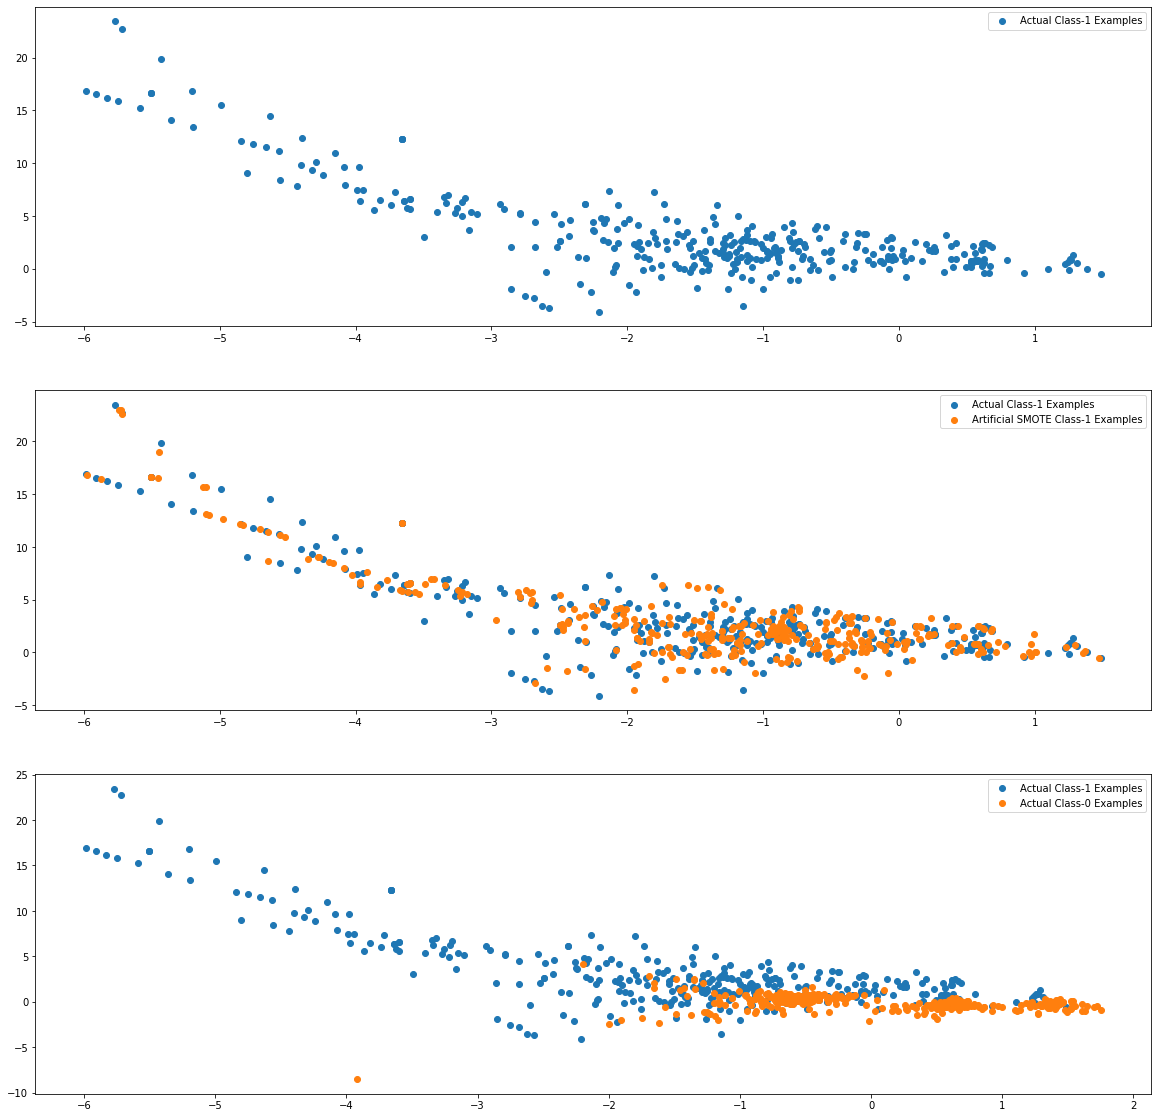

In [130]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [131]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters
## Logistic regression with Oversampling

# Logistic Regression with SMOTE

In [132]:

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform cross validation
logreg_smote= LogisticRegression()
scores = cross_val_score(bal_logreg, X_train_smote, y_train_smote, scoring='roc_auc', cv=3)
scores

array([0.98975542, 0.98999687, 0.98946392])

In [133]:
#perform hyperparameter tuning
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
model = LogisticRegression(max_iter=200, random_state=42)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = np.logspace(0,4, 10)
#[100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = RandomizedSearchCV(model, grid, n_jobs=-1, cv=folds, scoring='roc_auc',error_score=0,verbose=1 )
grid_result = grid_search.fit(X_train_smote, y_train_smote)


#print the evaluation result by choosing a evaluation metric
print(grid_result.best_score_, grid_result.best_params_)
#print the optimum value of hyperparameters

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.0s finished


0.9897405140933717 {'solver': 'newton-cg', 'penalty': 'l2', 'C': 464.15888336127773}


In [134]:
lr_clf= LogisticRegression(penalty='l2', C=464.15888336127773, solver='newton-cg')

lr_clf.fit(X_train_smote, y_train_smote)

LogisticRegression(C=464.15888336127773, solver='newton-cg')

In [135]:
# Predict probablity
pred_probs_test = lr_clf.predict_proba(X_test)[:,1]
pred_probs_test

array([0.33534226, 0.76441693, 0.03329738, ..., 0.02204816, 0.08531514,
       0.00249266])

In [136]:

roc_auc_lrsmote= metrics.roc_auc_score(y_test,pred_probs_test)
print(roc_auc_lrsmote)

0.977262180698783


In [137]:
score['9']= ['Logistic Regression with SMOTE','roc_auc: {}'.format(round((roc_auc_lrsmote*100),2))]


In [138]:
for x, y in score.items():
  print(x, y)


1 ['Imbalanced data logistic regression', 'roc_auc: 97.35']
2 ['Imbalanced data Decision tree', 'roc_auc: 94.05']
3 ['Imbalanced data random forest', 'roc_auc: 96.82']
4 ['Imbalanced data XGboost', 'roc_auc: 97.48']
5 ['Logistic Regression with Oversampling', 'roc_auc: 97.84']
6 ['Decision Tree with Oversampling', 'roc_auc: 91.48']
7 ['Random Forest with Oversampling', 'roc_auc: 93.75']
8 ['XGBoost with Oversampling ', 'roc_auc: 97.53']
9 ['Logistic Regression with SMOTE', 'roc_auc: 97.73']


# Decision Tree with SMOTE

In [139]:
from sklearn.tree import DecisionTreeClassifier

dt_clf_b = DecisionTreeClassifier()
cv_scores_dt= cross_val_score(dt_clf_b,X_train_smote, y_train_smote, cv=3,scoring='roc_auc')
cv_scores_dt

array([0.99779922, 0.99771631, 0.99773892])

In [140]:
dt_clf_b.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [141]:
from sklearn.metrics import  roc_auc_score

In [142]:
# Making predictions
y_pred_default = dt_clf_b.predict_proba(X_test)[:,1]

In [143]:
print(roc_auc_score(y_test,y_pred_default))

0.8975993491586435


###  hyperparameter tuning

In [144]:
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}



# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = RandomizedSearchCV( dtree, param_grid, 
                          cv = folds,scoring='roc_auc', verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   29.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   29.1s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   scoring='roc_auc', verbose=1)

In [145]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9987263682260137
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=100)


In [146]:
# model with optimal hyperparameters
clf_dt = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_dt.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=100, random_state=100)

In [147]:
# Making predictions
y_pred_proba_dt = clf_dt.predict_proba(X_test)[:,1]

In [148]:
# accuracy score
roc_auc_dtsmote= sklearn.metrics.roc_auc_score(y_test, y_pred_proba_dt)
print(roc_auc_dtsmote)

0.9379469979387911


In [149]:
score['10']= ['Decision Tree with SMOTE','roc_auc: {}'.format(round((roc_auc_dtsmote*100),2))]

# Random forest with SMOTE


In [150]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
cv_scores_rfc= cross_val_score(rfc,X_train_smote, y_train_smote, cv=3,scoring='roc_auc')
cv_scores_rfc

array([0.99999971, 0.99998217, 0.99999957])

In [151]:

# fit
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [152]:
# Making predictions
predictions = rfc.predict_proba(X_test)[:,1]


In [153]:

print(roc_auc_score(y_test,predictions))

0.9747150588656539


### hyperparameter tuning

In [154]:
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(rf,  param_grid, 
                          cv = folds,scoring='roc_auc' ,n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 15.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 15.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc', verbose=1)

In [155]:
# printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_,grid_search.best_params_)

0.9978023206082428 {'n_estimators': 100, 'min_samples_split': 400, 'min_samples_leaf': 100, 'max_features': 5, 'max_depth': 8}


In [156]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_b = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             max_features=5,
                             n_estimators=100)

# fit
rfc_b.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=100,
                       min_samples_split=400)

In [157]:
# predict
predictions = rfc.predict_proba(X_test)[:,1]
roc_auc_rfsmote= roc_auc_score(y_test,predictions)
print(roc_auc_rfsmote)

0.9747150588656539


In [158]:
score['11']= ['Random Forest with SMOTE','roc_auc: {}'.format(round((roc_auc_rfsmote*100),2))]

# XGBoost with SMOTE

In [159]:
from xgboost import XGBClassifier

# fit model no training data
xgb_clf = XGBClassifier()

cv_scores_rfc= cross_val_score(xgb_clf,X_train_smote, y_train_smote, cv=3,scoring='roc_auc')
cv_scores_rfc

array([0.99999497, 0.99997192, 0.99999835])

In [160]:
xgb_clf.fit(X_train_smote, y_train_smote)

y_pridicted= xgb_clf.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test,y_pridicted))

0.9745539724612355


### hyperparameter tuning

In [161]:
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

param={'max_depth': range(1, 10, 2),
        'reg_lambda' : [0,1],
        'colsample_bytree' : [0.5,1],
        'min_child_weight' : range (0, 10, 2),
        'n_estimators': range(100,400,100)
    }

xgb_clf_tuned = XGBClassifier()

grid_search = RandomizedSearchCV(xgb_clf_tuned, param, 
                          cv = folds,scoring='roc_auc' ,n_jobs = -1,verbose = 1)


grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=Non

In [162]:
# printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_,grid_search.best_params_)

0.9999937787561826 {'reg_lambda': 1, 'n_estimators': 300, 'min_child_weight': 0, 'max_depth': 5, 'colsample_bytree': 0.5}


In [163]:
xgb_clfb_final = XGBClassifier(n_estimators=300, colsample_bytree=0.5, max_depth=5,min_child_weight=0, reg_lambda=1, n_jobs=-1)

xgb_clfb_final.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
y_pred= xgb_clfb_final.predict_proba(X_test)[:,1]
roc_auc_xgsmote= roc_auc_score(y_test,y_pred)
print(roc_auc_xgsmote)

0.9761584991991229


In [165]:
score['12']= ['XGBoost with SMOTE ','roc_auc: {}'.format(round((roc_auc_xgsmote*100),2))]

In [166]:
for x, y in score.items():
    print(x, y)

1 ['Imbalanced data logistic regression', 'roc_auc: 97.35']
2 ['Imbalanced data Decision tree', 'roc_auc: 94.05']
3 ['Imbalanced data random forest', 'roc_auc: 96.82']
4 ['Imbalanced data XGboost', 'roc_auc: 97.48']
5 ['Logistic Regression with Oversampling', 'roc_auc: 97.84']
6 ['Decision Tree with Oversampling', 'roc_auc: 91.48']
7 ['Random Forest with Oversampling', 'roc_auc: 93.75']
8 ['XGBoost with Oversampling ', 'roc_auc: 97.53']
9 ['Logistic Regression with SMOTE', 'roc_auc: 97.73']
10 ['Decision Tree with SMOTE', 'roc_auc: 93.79']
11 ['Random Forest with SMOTE', 'roc_auc: 97.47']
12 ['XGBoost with SMOTE ', 'roc_auc: 97.62']


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

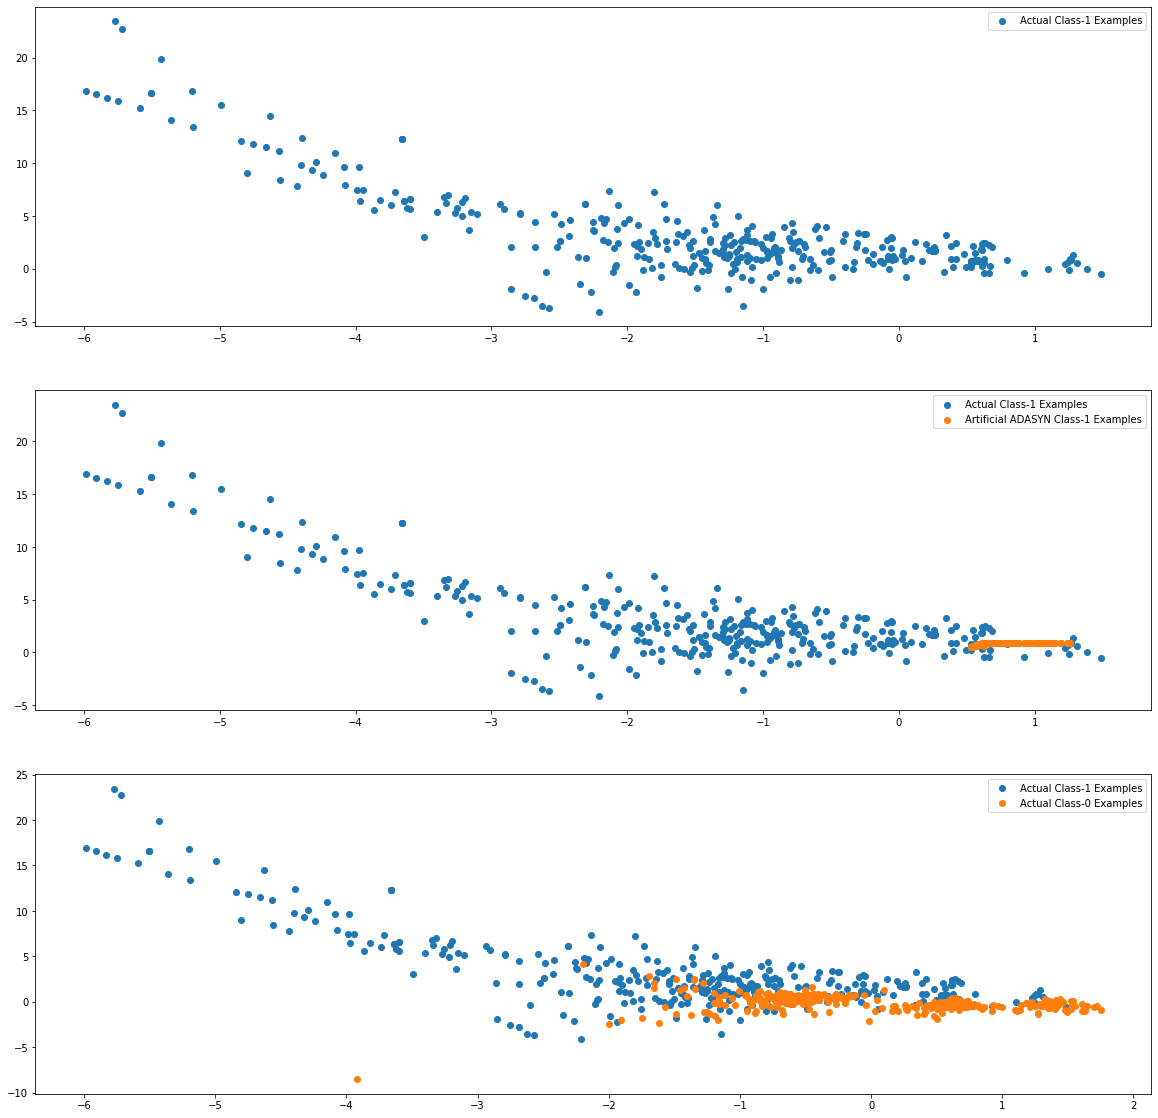

In [167]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# Logistic Regression with ADASYN

In [168]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

In [169]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform cross validation
logreg_smote= LogisticRegression()
scores = cross_val_score(bal_logreg, X_train_adasyn, y_train_adasyn, scoring='roc_auc', cv=3)
scores  

array([0.90217049, 0.94142005, 0.93069432])

In [170]:
#perform hyperparameter tuning
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
model = LogisticRegression(max_iter=200, random_state=42)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = np.logspace(0,4, 10)
#[100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = RandomizedSearchCV(model, grid, n_jobs=-1, cv=folds, scoring='roc_auc',error_score=0,verbose=1 )
grid_result = grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.8s finished


In [171]:
#print the evaluation result by choosing a evaluation metric
print(grid_result.best_score_, grid_result.best_params_)
#print the optimum value of hyperparameters

0.9647179295282627 {'solver': 'newton-cg', 'penalty': 'l2', 'C': 166.81005372000593}


In [172]:
lr_clf= LogisticRegression(penalty='l2', C=166.81005372000593, solver='newton-cg')

In [173]:
lr_clf.fit(X_train_adasyn, y_train_adasyn)

# Predict probablity
pred_probs_test = lr_clf.predict_proba(X_test)[:,1]
pred_probs_test

array([0.6038873 , 0.93502362, 0.11794415, ..., 0.05203249, 0.20871017,
       0.00257752])

In [174]:
roc_auc_lradasyn= metrics.roc_auc_score(y_test,pred_probs_test)
print(roc_auc_lradasyn)

0.9767033491079449


In [175]:
score['13']= ['Logistic Regression with ADASYN','roc_auc: {}'.format(round((roc_auc_lradasyn*100),2))]

In [176]:

for x, y in score.items():
    print(x, y)

1 ['Imbalanced data logistic regression', 'roc_auc: 97.35']
2 ['Imbalanced data Decision tree', 'roc_auc: 94.05']
3 ['Imbalanced data random forest', 'roc_auc: 96.82']
4 ['Imbalanced data XGboost', 'roc_auc: 97.48']
5 ['Logistic Regression with Oversampling', 'roc_auc: 97.84']
6 ['Decision Tree with Oversampling', 'roc_auc: 91.48']
7 ['Random Forest with Oversampling', 'roc_auc: 93.75']
8 ['XGBoost with Oversampling ', 'roc_auc: 97.53']
9 ['Logistic Regression with SMOTE', 'roc_auc: 97.73']
10 ['Decision Tree with SMOTE', 'roc_auc: 93.79']
11 ['Random Forest with SMOTE', 'roc_auc: 97.47']
12 ['XGBoost with SMOTE ', 'roc_auc: 97.62']
13 ['Logistic Regression with ADASYN', 'roc_auc: 97.67']


# Decision Tree with ADASYN

In [177]:
from sklearn.tree import DecisionTreeClassifier

dt_clf_b = DecisionTreeClassifier()
cv_scores_dt= cross_val_score(dt_clf_b,X_train_adasyn, y_train_adasyn, cv=3,scoring='roc_auc')
cv_scores_dt

array([0.85595843, 0.92699078, 0.87355096])

In [178]:
dt_clf_b.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier()

In [179]:

from sklearn.metrics import  roc_auc_score

# Making predictions
y_pred_default = dt_clf_b.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test,y_pred_default))


0.8808012493999364


###  hyperparameter tuning

In [180]:
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}



# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = RandomizedSearchCV( dtree, param_grid, 
                          cv = folds,scoring='roc_auc', verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.0s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   scoring='roc_auc', verbose=1)

In [181]:
# printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_)
print(grid_search.best_estimator_)


0.9944624353065646
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=100)


In [182]:
# model with optimal hyperparameters
clf_dt = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_dt.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=100, random_state=100)

In [183]:
# Making predictions
y_pred_proba_dt = clf_dt.predict_proba(X_test)[:,1]

roc_auc_dtadasyn= sklearn.metrics.roc_auc_score(y_test, y_pred_proba_dt)
print(roc_auc_dtadasyn)

0.9433441252378472


In [184]:
score['14']= ['Decision Tree with ADASYN','roc_auc: {}'.format(round((roc_auc_dtadasyn*100),2))]


In [185]:

for x, y in score.items():
    print(x, y)

1 ['Imbalanced data logistic regression', 'roc_auc: 97.35']
2 ['Imbalanced data Decision tree', 'roc_auc: 94.05']
3 ['Imbalanced data random forest', 'roc_auc: 96.82']
4 ['Imbalanced data XGboost', 'roc_auc: 97.48']
5 ['Logistic Regression with Oversampling', 'roc_auc: 97.84']
6 ['Decision Tree with Oversampling', 'roc_auc: 91.48']
7 ['Random Forest with Oversampling', 'roc_auc: 93.75']
8 ['XGBoost with Oversampling ', 'roc_auc: 97.53']
9 ['Logistic Regression with SMOTE', 'roc_auc: 97.73']
10 ['Decision Tree with SMOTE', 'roc_auc: 93.79']
11 ['Random Forest with SMOTE', 'roc_auc: 97.47']
12 ['XGBoost with SMOTE ', 'roc_auc: 97.62']
13 ['Logistic Regression with ADASYN', 'roc_auc: 97.67']
14 ['Decision Tree with ADASYN', 'roc_auc: 94.33']


# Random forest with ADASYN

In [186]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
cv_scores_rfc= cross_val_score(rfc,X_train_adasyn, y_train_adasyn, cv=3,scoring='roc_auc')
cv_scores_rfc

array([0.98323356, 0.995829  , 0.9975392 ])

In [187]:
# fit
rfc.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier()

In [188]:
# Making predictions
predictions = rfc.predict_proba(X_test)[:,1]



print(roc_auc_score(y_test,predictions))

0.97282376901786


### hyperparameter tuning

In [189]:
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(rf,  param_grid, 
                          cv = folds,scoring='roc_auc' ,n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc', verbose=1)

In [190]:
# printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_,grid_search.best_params_)

0.999348064715288 {'n_estimators': 100, 'min_samples_split': 200, 'min_samples_leaf': 100, 'max_features': 5, 'max_depth': 10}


In [191]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_b = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)

# fit
rfc_b.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=100,
                       min_samples_split=200)

In [192]:
# predict
predictions = rfc.predict_proba(X_test)[:,1]
roc_auc_rfadasyn= roc_auc_score(y_test,predictions)
print(roc_auc_rfadasyn)

0.97282376901786


In [193]:
score['15']= ['Random Forest with ADASYN','roc_auc: {}'.format(round((roc_auc_rfadasyn*100),2))]

In [194]:
for x, y in score.items():
    print(x, y)

1 ['Imbalanced data logistic regression', 'roc_auc: 97.35']
2 ['Imbalanced data Decision tree', 'roc_auc: 94.05']
3 ['Imbalanced data random forest', 'roc_auc: 96.82']
4 ['Imbalanced data XGboost', 'roc_auc: 97.48']
5 ['Logistic Regression with Oversampling', 'roc_auc: 97.84']
6 ['Decision Tree with Oversampling', 'roc_auc: 91.48']
7 ['Random Forest with Oversampling', 'roc_auc: 93.75']
8 ['XGBoost with Oversampling ', 'roc_auc: 97.53']
9 ['Logistic Regression with SMOTE', 'roc_auc: 97.73']
10 ['Decision Tree with SMOTE', 'roc_auc: 93.79']
11 ['Random Forest with SMOTE', 'roc_auc: 97.47']
12 ['XGBoost with SMOTE ', 'roc_auc: 97.62']
13 ['Logistic Regression with ADASYN', 'roc_auc: 97.67']
14 ['Decision Tree with ADASYN', 'roc_auc: 94.33']
15 ['Random Forest with ADASYN', 'roc_auc: 97.28']


# XGBoost with ADASYN

In [195]:
from xgboost import XGBClassifier

# fit model no training data
xgb_clf = XGBClassifier()

cv_scores_rfc= cross_val_score(xgb_clf,X_train_adasyn, y_train_adasyn, cv=3,scoring='roc_auc')
cv_scores_rfc

array([0.97462207, 0.99966848, 0.99947243])

In [196]:
xgb_clf.fit(X_train_adasyn, y_train_adasyn)

y_pridicted= xgb_clf.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test,y_pridicted))

0.9736683339063315


### hyperparameter tuning

In [197]:
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

param={'max_depth': range(1, 10, 2),
        'reg_lambda' : [0,1],
        'colsample_bytree' : [0.5,1],
        'min_child_weight' : range (0, 10, 2),
        'n_estimators': range(100,400,100)
    }

xgb_clf_tuned = XGBClassifier()

grid_search = RandomizedSearchCV(xgb_clf_tuned, param, 
                          cv = folds,scoring='roc_auc' ,n_jobs = -1,verbose = 1)


grid_search.fit(X_train_adasyn, y_train_adasyn)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 18.2min finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 18.2min remaining:    0.0s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=Non

In [198]:
# printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_,grid_search.best_params_)

0.9999908311194301 {'reg_lambda': 0, 'n_estimators': 300, 'min_child_weight': 2, 'max_depth': 7, 'colsample_bytree': 1}


In [199]:
xgb_clfb_final = XGBClassifier(n_estimators=300, colsample_bytree=1, max_depth=7,min_child_weight=2, reg_lambda=0, n_jobs=-1)

xgb_clfb_final.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [201]:

y_pred= xgb_clfb_final.predict_proba(X_test)[:,1]

roc_auc_xgadasyn= roc_auc_score(y_test,y_pred)
print(roc_auc_xgadasyn)

0.9758527637784922


In [202]:

score['16']= ['XGBoost with ADASYN ','roc_auc: {}'.format(round((roc_auc_xgadasyn*100),2))]

In [215]:
final_scores= {}
for x, y in score.items():
    print(x, y[0],(y[1].split(':')[1]))
    final_scores[y[0]]= (y[1].split(':')[1])

1 Imbalanced data logistic regression  97.35
2 Imbalanced data Decision tree  94.05
3 Imbalanced data random forest  96.82
4 Imbalanced data XGboost  97.48
5 Logistic Regression with Oversampling  97.84
6 Decision Tree with Oversampling  91.48
7 Random Forest with Oversampling  93.75
8 XGBoost with Oversampling   97.53
9 Logistic Regression with SMOTE  97.73
10 Decision Tree with SMOTE  93.79
11 Random Forest with SMOTE  97.47
12 XGBoost with SMOTE   97.62
13 Logistic Regression with ADASYN  97.67
14 Decision Tree with ADASYN  94.33
15 Random Forest with ADASYN  97.28
16 XGBoost with ADASYN   97.59


In [223]:
sort_scores = sorted(final_scores.items(), key=lambda x: x[1], reverse=True)
for i in sort_scores:
    print(i[0] , i[1])

Logistic Regression with Oversampling  97.84
Logistic Regression with SMOTE  97.73
Logistic Regression with ADASYN  97.67
XGBoost with SMOTE   97.62
XGBoost with ADASYN   97.59
XGBoost with Oversampling   97.53
Imbalanced data XGboost  97.48
Random Forest with SMOTE  97.47
Imbalanced data logistic regression  97.35
Random Forest with ADASYN  97.28
Imbalanced data random forest  96.82
Decision Tree with ADASYN  94.33
Imbalanced data Decision tree  94.05
Decision Tree with SMOTE  93.79
Random Forest with Oversampling  93.75
Decision Tree with Oversampling  91.48


### With the above result we can see that the highest roc_auc_score is 97.84 with Logistic Regression with Oversampling followed by logistic regression with smote and adasyn.
